In [1]:
%reset -f

import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import windows as win
import scipy.signal as sg

import control
import pandas as pd

In [2]:
### do not change these lines
###===
def get_data(dataset_number):
    yt = pd.read_csv("datasets.csv", usecols=[dataset_number-1])
    yt = yt.to_numpy()
    y = yt.reshape(-1)

    fs = 512 #sample frequency
    t = np.arange(0,1,1/fs) #time vector
    return t, fs, y
###===

<IPython.core.display.Javascript object>


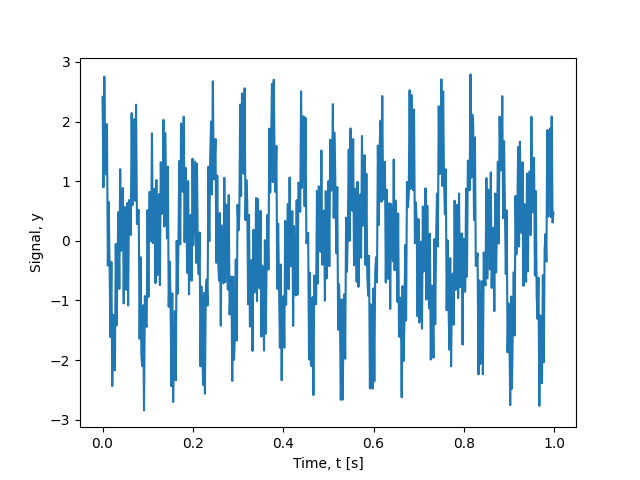

In [3]:
t, fs, y = get_data(26) #replace the X with dataset number assigned to you

plt.figure(1)
plt.plot(t,y)
plt.xlabel('Time, t [s]')
plt.ylabel('Signal, y')
plt.show()




<IPython.core.display.Javascript object>


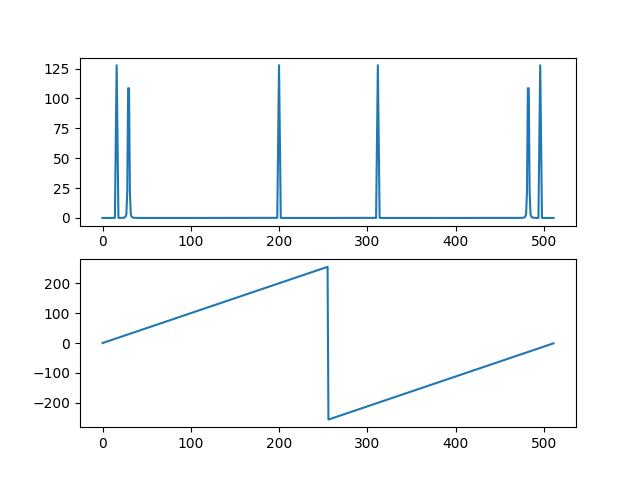

<IPython.core.display.Javascript object>


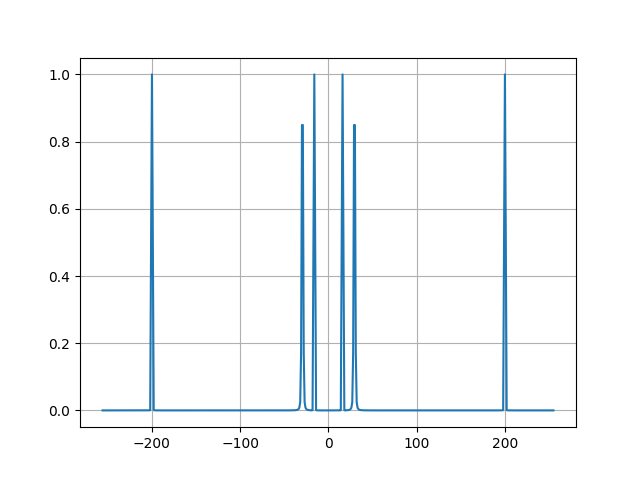

<IPython.core.display.Javascript object>


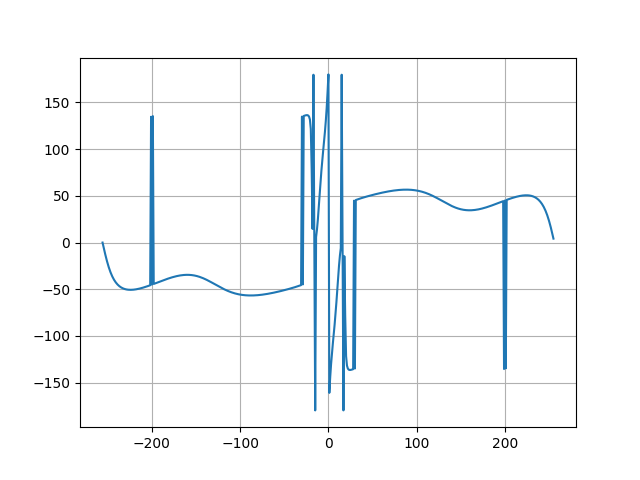

In [4]:
hw = win.hann(len(t))

outh =fft(y*hw)
out =fft(y)
sph=fftshift(outh)*2/len(t)
sp=fftshift(out)*2/len(t)



sph = sph*(len(hw)/sum(hw))
phase = np.angle(sph)

fv=fftfreq(len(t),1/fs)

fig,axs=plt.subplots(2)

axs[0].plot(abs(outh))
axs[1].plot(fv)

freq=fftshift(fv)
plt.figure()
plt.grid()
plt.plot(freq,abs(sph))

plt.figure()
plt.grid()
plt.plot(freq,np.rad2deg(phase))
#plt.plot(freq,abs(sp))

In [5]:
f = 100
R = 1000

C = ((1 - 0.707**2)/((0.707*2*np.pi*f*R)**2))**0.5
print(C)

1.5920301514468518e-06


In [6]:
f = 100
R = 1000

VolCut = 0.707

C = ((1 - VolCut**2)/((VolCut*2*np.pi*f*R)**2))**0.5
print(C)

1.5920301514468518e-06


<IPython.core.display.Javascript object>


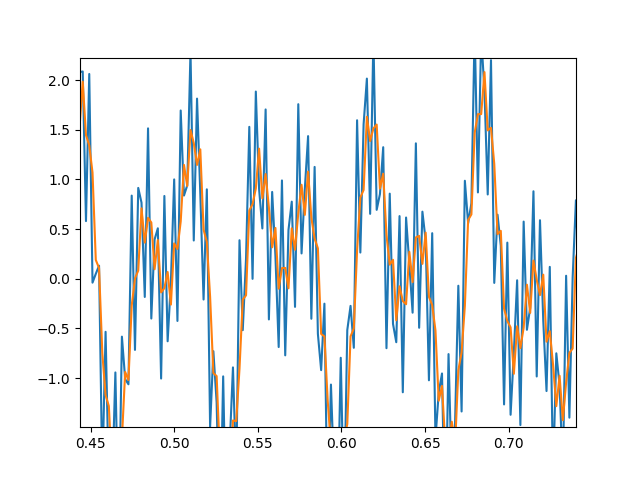

In [7]:
sos=sg.butter(1,100,btype = 'lowpass',output='sos',fs=fs)
yf=sg.sosfilt(sos,y)

plt.figure()
plt.plot(t,y,t,yf)

<IPython.core.display.Javascript object>


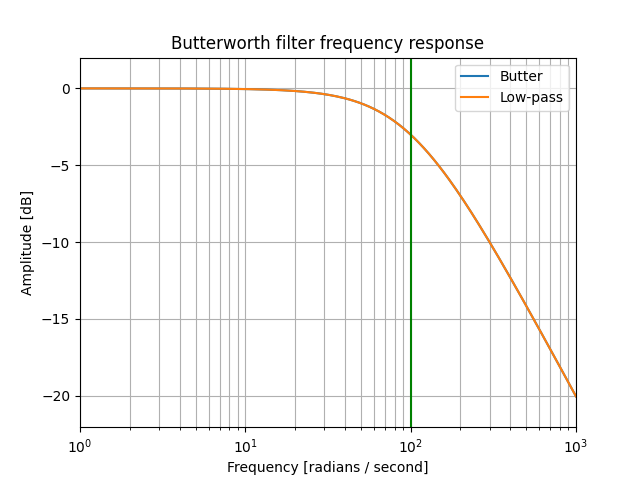

In [35]:
b, a = sg.butter(1, 100, 'low', analog=True)
w, h = sg.freqs(b, a)


plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)),label = 'Butter')
plt.semilogx(w, 20 * np.log10(abs((1/(2*np.pi*w*C))/((R**2 + (1/(2*np.pi*w*C))**2)**0.5))),label = 'Low-pass')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.legend()
plt.axvline(100, color='green') # cutoff frequency
plt.show()


<IPython.core.display.Javascript object>


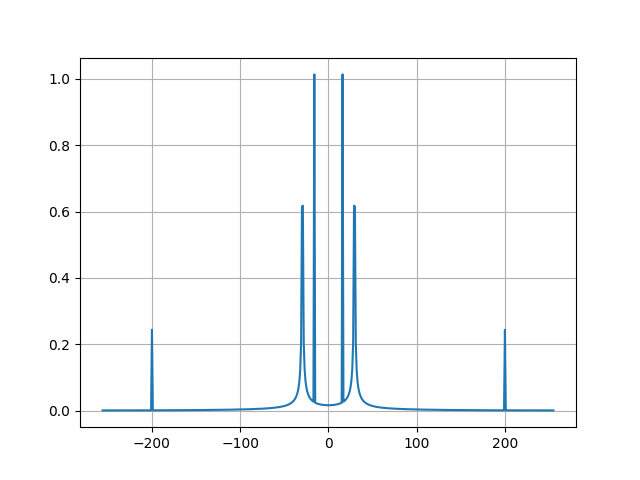

<IPython.core.display.Javascript object>


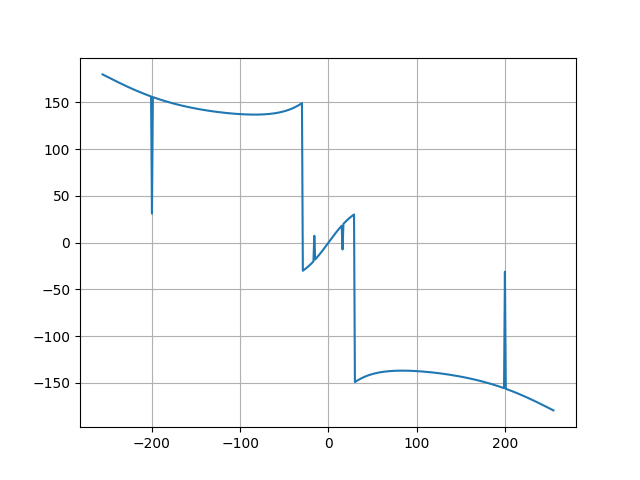

In [11]:
outf =fft(yf)
fvf=fftfreq(len(t),1/fs)
spf=fftshift(outf)*2/len(t)
phasef = np.angle(spf)

plt.figure()
plt.grid()
plt.plot(freq,abs(spf))

plt.figure()
plt.grid()
plt.plot(freq,np.rad2deg(phasef))
#plt.plot(freq,abs(sp))